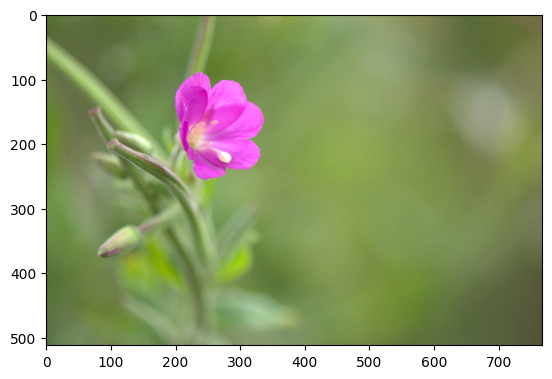

In [1]:
import augmentations
import numpy as np
import matplotlib.pyplot as plt
import rawpy



def load_nef(path = 'C:/Users/Rani/Desktop/ai_training_immages' + "/16/_DSC0570.nef"):
    img = rawpy.imread(path).postprocess()
    width, height, _ = img.shape
    if width < height:
        return img
    return np.rot90(img)

def get_compressed_imgs(img, width=512, height=768):
    original_width, original_height, _ = img.shape
    sizes = min(original_height//height, original_width//width)
    cut_img = img[:original_width//width*width, :original_height//height*height]
    cut_width, cut_height, _ = cut_img.shape
    for size in range(1,sizes+1):
        if cut_width//size % width == 0 and cut_height//size % height == 0:
            yield cut_img[::size,::size]

img = list(get_compressed_imgs(load_nef()))[-1]
plt.imshow(img)


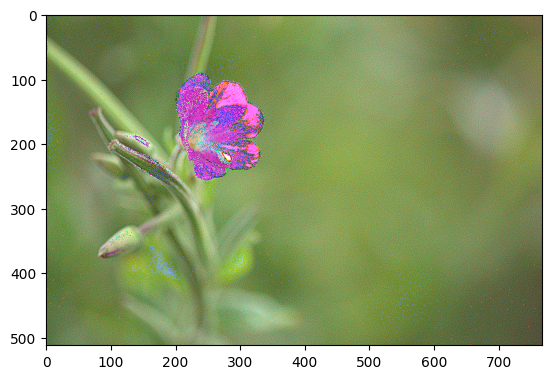

In [2]:
sharpened = augmentations.sharpen(img)
plt.imshow(sharpened)


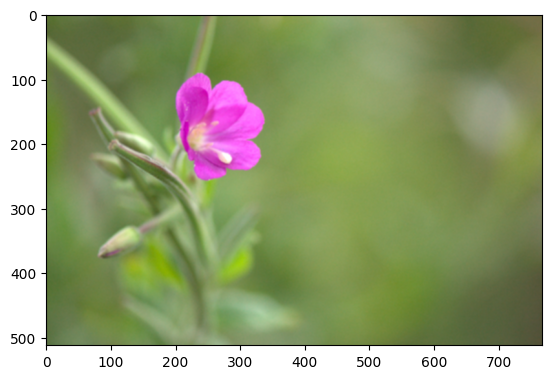

In [3]:
boxBlur = augmentations.box_blur_3x3(img)
plt.imshow(boxBlur)

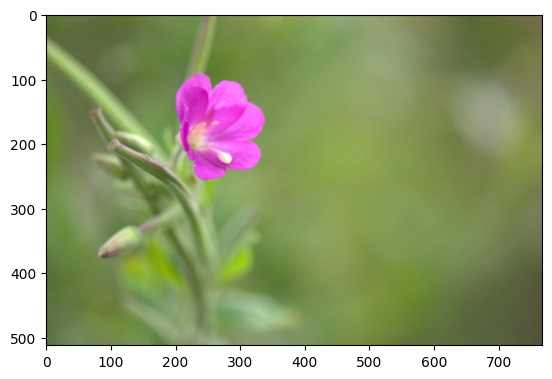

In [4]:
gaussioan_blur_3x3 = augmentations.Gaussioan_blur_3x3(img)
plt.imshow(gaussioan_blur_3x3)

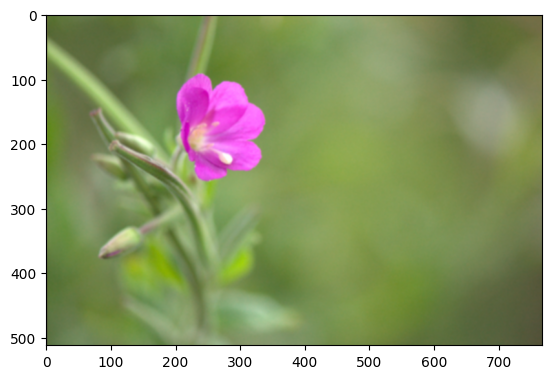

In [5]:
Gaussioan_blur_5x5 = augmentations.Gaussioan_blur_5x5(img)
plt.imshow(Gaussioan_blur_5x5)

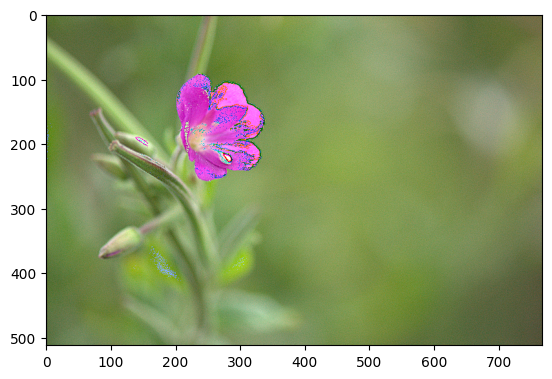

In [6]:
Unsharp_masking_5x5 = augmentations.Unsharp_masking_5x5(img)
plt.imshow(Unsharp_masking_5x5)